In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

sys.path.append("./modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append("./classes")
import Track

In [2]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))







In [3]:
path = outputDataFolder+'/features.csv'
print(path)

featureNames = ['trackId','trackLenght','lifetime','catIdx','meanFrameId', #early or late track
                'meanX','meanY','meanZ','varX','varY','varZ',
                'meanVelocity','varVelocity',
                'distanceTraveled',
                'm_meanIntensity','m_maxIntensity','m_minIntensity','m_varIntensity','m_intensityAUC','m_intensityDiffFirstLast',
                's_meanIntensity','s_maxIntensity','s_minIntensity','s_varIntensity','s_intensityAUC','s_intensityDiffFirstLast'] #intensity AUC will be high for triangle shaped
features = pd.read_csv(path,names = featureNames, index_col =1,header=0,dtype='float')
#features[1:10]['trackId'] = features[1:10]['trackId'].astype(int)

#features['trackId'] = features['trackId'].astype(int)

features[1:10]

/Users/johannesschoeneberg/git/LatticeTrack/data/test_input/crop_100x100x100_bleachCorrected/output/features.csv


,trackId,trackLenght,lifetime,catIdx,meanFrameId,meanX,meanY,meanZ,varX,varY,...,m_minIntensity,m_varIntensity,m_intensityAUC,m_intensityDiffFirstLast,s_meanIntensity,s_maxIntensity,s_minIntensity,s_varIntensity,s_intensityAUC,s_intensityDiffFirstLast
1.0,1.0,83.0,398.23,8.0,37.256098,75.728613,69.043805,83.687999,4.925946,4.925946,...,-1360.3130,8.737928e+07,1.0,3616.7800,24818.053171,69363.50,-2855.5780,1.793622e+08,1.0,-1482.4600
2.0,2.0,70.0,398.23,4.0,35.500000,79.372957,56.960419,74.201671,4.067715,4.067715,...,3570.4720,1.960883e+07,1.0,883.2950,13313.682013,49200.53,659.4469,1.018641e+08,1.0,-3453.4480
3.0,3.0,75.0,398.23,8.0,33.878378,76.359349,53.252091,64.540903,6.129564,6.129564,...,1640.9140,1.305688e+07,1.0,-205.6310,9123.233941,26337.41,-4859.4180,5.139327e+07,1.0,778.8760
4.0,4.0,70.0,398.23,4.0,35.500000,77.811600,34.683369,57.680825,3.166868,3.166868,...,5913.4410,1.509706e+07,1.0,9659.2440,20370.355614,48645.96,7298.4650,9.843705e+07,1.0,7627.9620
5.0,5.0,77.0,398.23,8.0,37.394737,53.940486,81.285509,47.803007,12.429035,12.429035,...,1265.9440,6.670230e+06,1.0,15078.2520,22044.400103,64455.72,-473.7413,1.180987e+08,1.0,12002.8010
6.0,6.0,70.0,398.23,4.0,35.500000,61.437950,53.624291,61.548703,2.125682,2.125682,...,-2062.3170,2.112251e+06,1.0,3674.1570,3119.309795,12638.48,-5177.7690,1.921954e+07,1.0,2879.1080
7.0,7.0,77.0,398.23,8.0,37.947368,77.910633,45.208284,80.346601,2.317116,2.317116,...,921.4355,1.951189e+07,1.0,19442.6370,14302.650464,39904.40,-2096.4520,8.930447e+07,1.0,-4115.7000
8.0,8.0,175.0,398.23,8.0,26.175439,62.664925,72.392445,50.546598,31.572488,31.572488,...,-1844.8190,1.144191e+07,1.0,16868.0530,6252.512992,84495.73,-8216.2030,1.502214e+08,1.0,17499.9950
9.0,9.0,201.0,398.23,8.0,40.845361,40.730530,36.348650,37.518554,9.525391,9.525391,...,-1053.9970,1.610730e+07,1.0,7087.2110,9991.051873,47977.99,-7415.1070,1.358664e+08,1.0,-3248.0150
10.0,10.0,84.0,398.23,8.0,31.036145,75.015123,73.945040,47.106017,27.733442,27.733442,...,-583.8882,3.633224e+06,1.0,-4571.0844,5176.402708,26330.41,-6273.0160,4.567738e+07,1.0,-4426.2604


In [4]:
#load classes

In [5]:
path = '/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/christine_and_fahad/2018-04-11_data_manual_classification_results/allTrackIdsLrgrThanFour_evaluation_joh.csv'
print(path)
classes = pd.read_csv(path,names=['trackId','class'],header=0,dtype='float')
#classes['trackId'] = classes['trackId'].astype(int)
classes[0:10]

/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/christine_and_fahad/2018-04-11_data_manual_classification_results/allTrackIdsLrgrThanFour_evaluation_joh.csv


,trackId,class
0,1.0,1.0
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,0.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


In [6]:
#df = pd.merge(features,classes,left_on='trackId', right_on='trackId')
print(len(classes))
print(len(features))
features['trackId'] = features['trackId'].astype(int)
df = pd.merge(features,classes)
print(len(df))
df[0:10]

1296
1555
1296


,trackId,trackLenght,lifetime,catIdx,meanFrameId,meanX,meanY,meanZ,varX,varY,...,m_varIntensity,m_intensityAUC,m_intensityDiffFirstLast,s_meanIntensity,s_maxIntensity,s_minIntensity,s_varIntensity,s_intensityAUC,s_intensityDiffFirstLast,class
0,1,83.0,398.23,8.0,37.256098,75.728613,69.043805,83.687999,4.925946,4.925946,...,8.737928e+07,1.0,3616.7800,24818.053171,69363.50,-2855.5780,1.793622e+08,1.0,-1482.4600,1.0
1,2,70.0,398.23,4.0,35.500000,79.372957,56.960419,74.201671,4.067715,4.067715,...,1.960883e+07,1.0,883.2950,13313.682013,49200.53,659.4469,1.018641e+08,1.0,-3453.4480,1.0
2,3,75.0,398.23,8.0,33.878378,76.359349,53.252091,64.540903,6.129564,6.129564,...,1.305688e+07,1.0,-205.6310,9123.233941,26337.41,-4859.4180,5.139327e+07,1.0,778.8760,1.0
3,4,70.0,398.23,4.0,35.500000,77.811600,34.683369,57.680825,3.166868,3.166868,...,1.509706e+07,1.0,9659.2440,20370.355614,48645.96,7298.4650,9.843705e+07,1.0,7627.9620,1.0
4,5,77.0,398.23,8.0,37.394737,53.940486,81.285509,47.803007,12.429035,12.429035,...,6.670230e+06,1.0,15078.2520,22044.400103,64455.72,-473.7413,1.180987e+08,1.0,12002.8010,1.0
5,6,70.0,398.23,4.0,35.500000,61.437950,53.624291,61.548703,2.125682,2.125682,...,2.112251e+06,1.0,3674.1570,3119.309795,12638.48,-5177.7690,1.921954e+07,1.0,2879.1080,0.0
6,7,77.0,398.23,8.0,37.947368,77.910633,45.208284,80.346601,2.317116,2.317116,...,1.951189e+07,1.0,19442.6370,14302.650464,39904.40,-2096.4520,8.930447e+07,1.0,-4115.7000,1.0
7,8,175.0,398.23,8.0,26.175439,62.664925,72.392445,50.546598,31.572488,31.572488,...,1.144191e+07,1.0,16868.0530,6252.512992,84495.73,-8216.2030,1.502214e+08,1.0,17499.9950,1.0
8,9,201.0,398.23,8.0,40.845361,40.730530,36.348650,37.518554,9.525391,9.525391,...,1.610730e+07,1.0,7087.2110,9991.051873,47977.99,-7415.1070,1.358664e+08,1.0,-3248.0150,1.0
9,10,84.0,398.23,8.0,31.036145,75.015123,73.945040,47.106017,27.733442,27.733442,...,3.633224e+06,1.0,-4571.0844,5176.402708,26330.41,-6273.0160,4.567738e+07,1.0,-4426.2604,1.0


In [7]:
# try feature selection

['s_meanIntensity' 'm_maxIntensity' 's_maxIntensity' 'm_varIntensity'
 's_varIntensity']
[  4.856e+05   1.002e+06   2.193e+06   1.591e+09   7.447e+09]


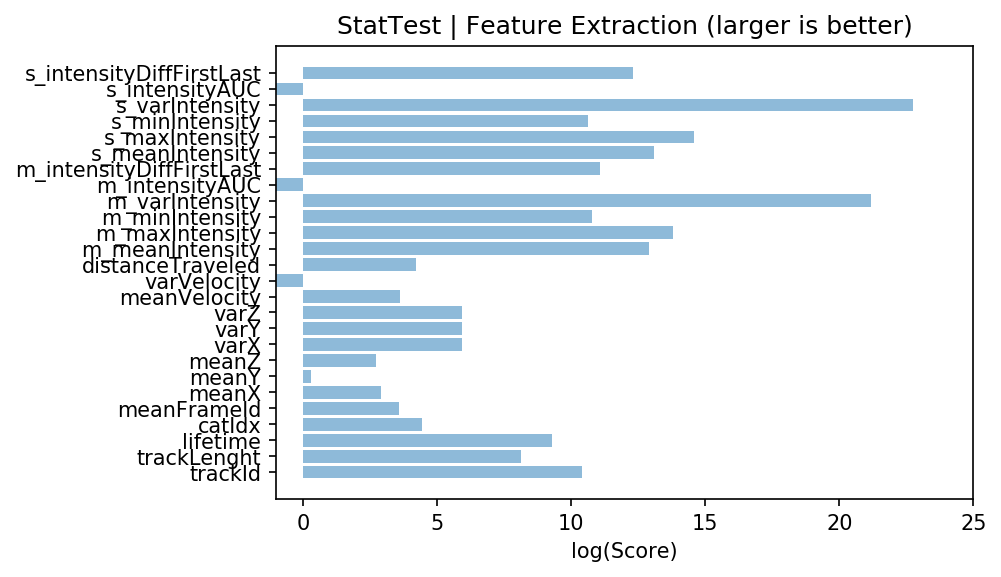

In [10]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

array = df.values
X = np.abs(array[:,0:len(featureNames)])
Y = array[:,len(featureNames)].astype(float)
#print(X)
#print(Y)
# feature extraction
nFeatures = 5
test = SelectKBest(score_func=chi2, k=nFeatures)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)
#print(featureNames)
#print(fit.scores_)

scores = fit.scores_

#extract the features and display them
bestFeaturesIndexes = scores.argsort()[-nFeatures:]
print(np.array(featureNames)[bestFeaturesIndexes])
print(scores[bestFeaturesIndexes])


plt.figure(dpi=150)
y_pos = np.array(range(0,len(featureNames)))
plt.barh(y_pos, np.log(scores), align='center', alpha=0.5)
plt.yticks(y_pos, featureNames)
plt.xlabel('log(Score)')
plt.title('StatTest | Feature Extraction (larger is better)')
plt.xlim(-1,25)


features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=5, step=1, verbose=0)
5
[False False False  True  True False False  True False False False  True
 False  True False False False False False False False False False False
 False False]
[ 3  9  7  1  1  2 18  1 11 10  8  1  4  1 12 14 13 21  6 16 19 17 15 22  5
 20]


Text(0.5,1,'RFE | Feature Extraction (smaller is better)')

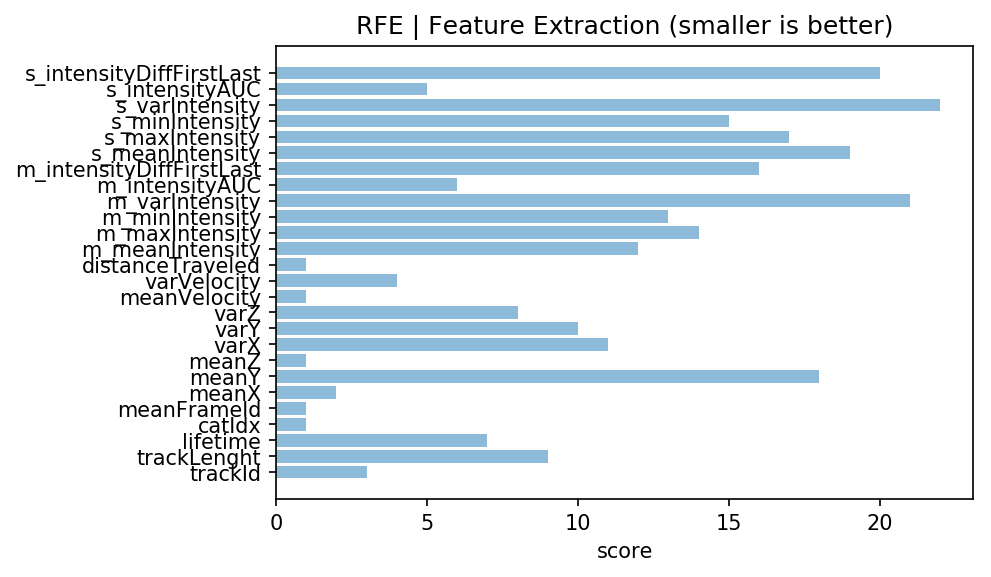

In [11]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
# load data


# feature extraction
model = LogisticRegression()
#model = SVR(kernel="linear"), tkes > 30min
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print(fit)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)


plt.figure(dpi=150)
y_pos = np.array(range(0,len(featureNames)))
plt.barh(y_pos, fit.ranking_, align='center', alpha=0.5)
plt.yticks(y_pos, featureNames)
plt.xlabel('score')
plt.title('RFE | Feature Extraction (smaller is better)')



#extract the features and display them




#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

[ 0.045  0.039  0.039  0.04   0.038  0.035  0.038  0.034  0.027  0.029
  0.031  0.048  0.     0.032  0.077  0.092  0.035  0.065  0.     0.036
  0.06   0.053  0.031  0.046  0.     0.03 ]


Text(0.5,1,'ExtraTreesClassifier | Feature Extraction (larger is better)')

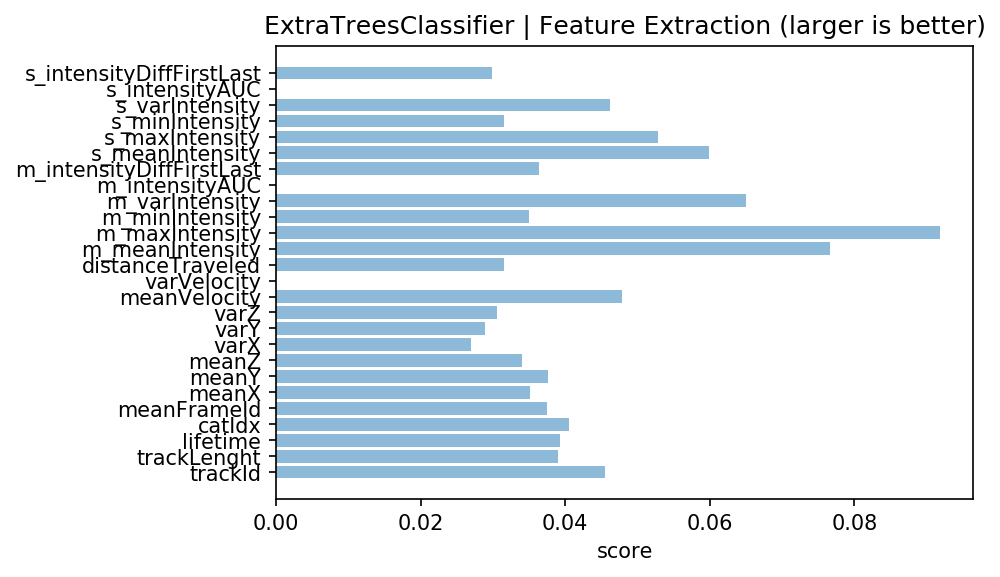

In [12]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)


plt.figure(dpi=150)
y_pos = np.array(range(0,len(featureNames)))
plt.barh(y_pos, model.feature_importances_, align='center', alpha=0.5)
plt.yticks(y_pos, featureNames)
plt.xlabel('score')
plt.title('ExtraTreesClassifier | Feature Extraction (larger is better)')
